# Exemple de parcours en profondeur : Labyrinthe

## Génération du labyrinthe

In [3]:
import matplotlib.pyplot as plt
import networkx as nx
import random

def generate_labyrinth(n, p):
    G = nx.Graph()
    G.add_nodes_from((i, j) for i in range(n) for j in range(p))
    visited = [[False]*p for _ in range(n)]
    def dfs(i, j):
        visited[i][j] = True
        neighbors = [(i+1, j), (i-1, j), (i, j+1), (i, j-1)]
        random.shuffle(neighbors)
        for x, y in neighbors:
            if 0 <= x < n and 0 <= y < p and not visited[x][y]:
                G.add_edge((i, j), (x, y))
                dfs(x, y)
    dfs(0, 0)
    return G

def draw(G, **keywords):
    plt.clf()
    nx.draw(G, pos={p: p for p in G.nodes()}, node_size=20, **keywords)
    plt.show()

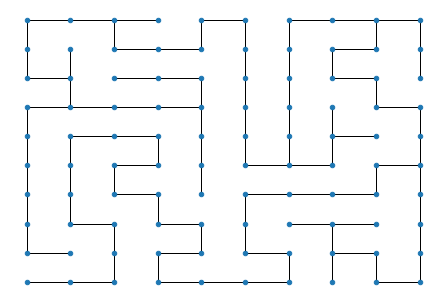

In [4]:
n = 10
G = generate_labyrinth(n, n)
draw(G)

## Résolution avec parcours en profondeur

In [23]:
def solve_labyrinth(G, n):
    visited = [[False]*n for _ in range(n)]
    path = []
    for i,e in enumerate(G.edges):
        G.edges[e]['index'] = i
    def dfs(i, j):
        if i == n - 1 == j:
            return True
        visited[i][j] = True
        neighbors = [(i+1, j), (i-1, j), (i, j+1), (i, j-1)]
        random.shuffle(neighbors)
        for x, y in neighbors:
            if 0 <= x < n and 0 <= y < n and (x, y) in G[(i, j)] and not visited[x][y]:
                if dfs(x, y):
                    path.append(G[(i, j)][(x, y)]['index'])
                    return True
        return False
    dfs(0, 0)
    return path

In [27]:
path = solve_labyrinth(G, n)
widths = [4 if i in path else 1 for i in range(len(G.edges))]
draw(G, width=widths)

## Animation

In [28]:
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.animation
from IPython.display import HTML

def anim_traversal(G, widths):
    fig, ax = plt.subplots(figsize=(20,12))
    plt.close()
    def update(frame):
        ax.clear()
        nx.draw(G, ax=ax, pos={p: p for p in G.nodes()}, node_size=700, width=widths[frame])
    ani = matplotlib.animation.FuncAnimation(fig, update, frames=len(widths), interval=80)
    return HTML(ani.to_jshtml(default_mode="once"))

In [29]:
def solve_labyrinth(G, n):
    widths = [1]*len(G.edges)
    visited = [[False]*n for _ in range(n)]
    frame_widths = []
    for i,e in enumerate(G.edges):
        G.edges[e]['index'] = i
    def dfs(i, j):
        if i == n - 1 == j:
            return True
        visited[i][j] = True
        neighbors = [(i+1, j), (i-1, j), (i, j+1), (i, j-1)]
        random.shuffle(neighbors)
        for x, y in neighbors:
            if 0 <= x < n and 0 <= y < n and (x, y) in G[(i, j)] and not visited[x][y]:
                widths[G[(i, j)][(x, y)]['index']] = 6
                frame_widths.append(widths.copy())
                if dfs(x, y):
                    return True
                widths[G[(i, j)][(x, y)]['index']] = 1
                frame_widths.append(widths.copy())
        return False
    dfs(0, 0)
    return frame_widths

In [30]:
anim_traversal(G, solve_labyrinth(G, n))